Assignment: Exploratory data analysis
=====================================

**TODO**: Edit this cell to fill in your name:

-   **Name**: Joel Palea

Introduction
------------

In this assignment, we will practice using exploratory data analysis on
Google’s COVID-19 Community Mobility data.

This data was collected from Google Maps users around the world over the
duration of the COVID-19 pandemic - including you, *if* you have Google Maps on your phone
and have turned on the Location History setting. It combines location
history from a large number of users to capture the overall increase or
decrease in time spent in places such as: retail and recreation
facilities, groceries and pharmacies, parks, transit stations,
workplaces, and residences.

The data shows how users’ mobility patterns - what types of places they
spend time in - varied over the course of the COVID-19 pandemic.

As you work through this notebook, you will see that some text and code
cells are marked with a “TODO” at the top. You’ll have to edit these
cells to fill in the code or answer the questions as indicated.

When you are finished, make sure you have run all of the cells in the
notebook (in order), and then submit the result on moodle.

**Important note**: You won’t necessarily have learned or seen in
advance how to use all the Python commands and library functions you
need to complete this assignment. That’s OK. Part of the learning
objective here is to practice finding and applying that kind of new
information as you go! Use the library documentation, search the
Internet, or ask your peers/the professor need any help.

Learn about the data
--------------------

First, it is worthwhile to learn more about the data: how it is
collected, what is included, how Google gets consent to collect this
data, and how user privacy is protected. Google provides several
resources for learning about the data:

-   [Blog
    post](https://www.blog.google/technology/health/covid-19-community-mobility-reports?hl=en)
-   [About this
    data](https://www.google.com/covid19/mobility/data_documentation.html?hl=en#about-this-data)
-   [Understand the
    data](https://support.google.com/covid19-mobility/answer/9825414?hl=en&ref_topic=9822927)

Read in data
------------

Now you are ready to read the data into your notebook.

Visit Google’s web page for the [COVID-19 Community
Mobility](https://www.google.com/covid19/mobility/) project to get the
URL for the data.

(Specific instructions will depend on your browser and operating system,
but on my laptop, I can get the URL by right-clicking on the button that
says “Download global CSV” and choosing “Copy Link Address”.)

Then, in the following cells, use that URL to read the data into a
pandas Data Frame called `df`. (You can follow the example in the
“Exploratory data analysis” notebook from this week’s lesson.)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# TODO Q
url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
df = pd.read_csv(url)

/tmp/ipython-input-4202795366.py:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


Use the `info()` and `head()` functions to show some basic information
about the data and to look at the first few samples.

In [4]:
# TODO Q2
# use info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11730025 entries, 0 to 11730024
Data columns (total 15 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   place_id                                            object 
 8   date                                                object 
 9   retail_and_recreation_percent_change_from_baseline  float64
 10  grocery_and_pharmacy_percent_change_from_baseline   float64
 11  parks_percent_change_from_baseline 

In [5]:
# TODO Q3
# use head()
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


Basic data manipulations
------------------------

The data includes a date field, but it may have been read in as a
string, rather than as a `datetime`. If that’s the case, use
`to_datetime()` to convert the field into a datetime format. (You can
follow the example in the “Exploratory data analysis” notebook from this
week’s lesson.)

Then, use `info()` again to make sure your change was applied. Note the
difference in the output, relative to the cell above.

In [6]:
# TODO Q4
# df['date'] = ...
df['date'] = pd.to_datetime(df['date'])

Next, you are going to extract the subset of data for the U.S. state of
your choice. You can choose any location *except* New York. - You can also try an Austrian "Bundesland" if the data is available.

The data is reported for different regions, with different levels of
granularity available. This is best explained by example:

Suppose I want the overall trend from the entire U.S. I would use the
subset of data where `country_region` is equal to “United States” and
`sub_region_1` is null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].isnull())]

Suppose I want the overall trend from the entire state of New York: I
would use the subset of data where `country_region` is equal to “United
States”, `sub_region_1` is equal to “New York”, and `sub_region_2` is
null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].isnull())]

Suppose I want the overall trend from Brooklyn, New York (Kings County):
I would use the subset of data where `country_region` is equal to
“United States”, `sub_region_1` is equal to “New York”, and
`sub_region_2` is equal to “Kings County”:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].eq("Kings County"))]

In the following cell(s), fill in the code to create a data frame
`df_subset` with data from a single U.S. state (but *not* New York).

In [13]:
# TODO Q5
# df_subset =
df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("California"))]
print(df_subset)
df_subset2 = df[(df['country_region'].eq("Austria")) & (df['sub_region_1'].eq("Vienna"))]
print(df_subset2)

        country_region_code country_region sub_region_1 sub_region_2  \
9253444                  US  United States   California          NaN   
9253445                  US  United States   California          NaN   
9253446                  US  United States   California          NaN   
9253447                  US  United States   California          NaN   
9253448                  US  United States   California          NaN   
...                     ...            ...          ...          ...   
9307997                  US  United States   California  Yuba County   
9307998                  US  United States   California  Yuba County   
9307999                  US  United States   California  Yuba County   
9308000                  US  United States   California  Yuba County   
9308001                  US  United States   California  Yuba County   

        metro_area iso_3166_2_code  census_fips_code  \
9253444        NaN           US-CA               NaN   
9253445        NaN     

Is the data complete, or is some data not available for the location you
have chosen? In the following cell, write code to check for missing data
in the `...percent_change_from_baseline` fields.

Also check whether there are any missing rows of data. What date range
is represented in this data? Is every day within that range included in
the data?

In [15]:
# TODO Q6
# df_subset
df_subset.isnull().sum()

,0
country_region_code,0
country_region,0
sub_region_1,0
sub_region_2,974
metro_area,54558
iso_3166_2_code,53584
census_fips_code,974
place_id,0
date,0
retail_and_recreation_percent_change_from_baseline,3482


**TODO** Q7: Edit this cell to answer the following question: Is the
data complete, or is some relevant data missing? Why would some
locations only have partial data available (missing some
`...percent_change_from_baseline` fields for some dates)? (Even if, for
the U.S. state you have chosen, the data is complete, explain why some
data may be missing for other regions.)

**Include a short quote from the material you read in the “Learn about
the data” section to answer this question. Indicate that it is a quote
using quotation marks or a block quote, and cite the source, including a
URL.**

 - Die Daten können für manche Tage und Kategorien unvollständig sein (z. B. parks_percent_change_from_baseline mit NaN an einzelnen Tagen).
 - Fehlende Werte und Lücken im Tagesintervall entstehen, weil Google nur aggregierte, anonymisierte Daten veröffentlicht und strenge Schwellen für Mindestanzahl von Beiträgen (Samples) pro Region/Tag nutzt. Wenn diese Schwellen nicht erfüllt werden, wird der Wert nicht veröffentlicht, um Privatsphäre zu schützen.

Zitat (Quelle: Google COVID‑19 Community Mobility Reports, Datenschutz/Methodik): https://www.google.com/url?q=https%3A%2F%2Fwww.google.com%2Fcovid19%2Fmobility%2F

- An Tagen oder in Regionen mit zu wenigen aktiven Nutzern (oder geringer Standortdatenabdeckung) überschreitet die Stichprobe die Mindestschwelle nicht, daher fehlen Werte (NaN).
- Änderungen im Messsystem, Feiertage oder technische Aussetzer können ebenfalls zu Lücken führen.
- Für State‑Aggregate werden County‑Zeilen ausgeschlossen; wenn nur County‑Werte verfügbar sind, kann das State‑Aggregat an einem Tag fehlen.




To track trends in cases and vaccinations alongside mobility trends, we
can also read in data from several other sources. For example,

-   Our World in Data distributes data about COVID-19 vaccination status
    over time for U.S. states in their [Github
    repository](https://github.com/owid/covid-19-data).
-   The New York Times distributes data about COVID-19 cumulative cases
    over time for U.S. states in their [Github
    repository](https://github.com/nytimes/covid-19-data).

You can choose whether to look at vaccination trends or case trends for
the U.S. state you have selected. Use one of the following cells to read
in the data, convert the `date` field to a `datetime`, and get the
subset of the data that applies to the specific U.S. state for which you
are exploring mobility data.

Then, use `pandas` functions to check your new data frame and look at
the first few rows of data.

In [24]:
# TODO Q8 - Vaccinations option

url_vax = 'https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/us_state_vaccinations.csv'
df_vax = pd.read_csv(url_vax)
df_vax['date'] = pd.to_datetime(df_vax['date'])

df_vax_subset = df_vax[(df_vax['location'].eq("California"))]
# check the data frame and look at a few rows
df_vax_subset.info()
df_vax_subset.head()

<class 'pandas.core.frame.DataFrame'>
Index: 849 entries, 5094 to 5942
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 849 non-null    datetime64[ns]
 1   location                             849 non-null    object        
 2   total_vaccinations                   422 non-null    float64       
 3   total_distributed                    422 non-null    float64       
 4   people_vaccinated                    422 non-null    float64       
 5   people_fully_vaccinated_per_hundred  421 non-null    float64       
 6   total_vaccinations_per_hundred       422 non-null    float64       
 7   people_fully_vaccinated              421 non-null    float64       
 8   people_vaccinated_per_hundred        422 non-null    float64       
 9   distributed_per_hundred              422 non-null    float64       
 10  daily_vaccinati

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
5094,2021-01-12,California,816301.0,3286050.0,703540.0,0.25,2.07,100089.0,1.78,8.32,NaN,NaN,NaN,0.248,NaN,NaN
5095,2021-01-13,California,891489.0,3435650.0,744545.0,0.34,2.26,133689.0,1.88,8.70,75188.0,75188.0,1903.0,0.259,NaN,NaN
5096,2021-01-14,California,975293.0,3540175.0,801998.0,NaN,2.47,NaN,2.03,8.96,83804.0,79496.0,2012.0,0.275,NaN,NaN
5097,2021-01-15,California,1072959.0,3548575.0,865387.0,0.52,2.72,204374.0,2.19,8.98,97666.0,85553.0,2165.0,0.302,NaN,NaN
5098,2021-01-16,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88381.0,2237.0,NaN,NaN,NaN


In [27]:
# TODO Q8 - Cases option

url_cases = 'https://github.com/nytimes/covid-19-data/raw/master/us-states.csv'
df_cases = pd.read_csv(url_cases)
df_cases['date'] = pd.to_datetime(df_cases['date'])
df_cases_subset = df_cases[(df_cases['state'].eq('California'))]
# check the data frame and look at a few rows
print(df_cases_subset)

            date       state  fips     cases  deaths
5     2020-01-25  California     6         1       0
9     2020-01-26  California     6         2       0
13    2020-01-27  California     6         2       0
17    2020-01-28  California     6         2       0
21    2020-01-29  California     6         2       0
...          ...         ...   ...       ...     ...
61667 2023-03-19  California     6  12153083  104130
61723 2023-03-20  California     6  12154293  104165
61779 2023-03-21  California     6  12154941  104185
61835 2023-03-22  California     6  12155467  104196
61891 2023-03-23  California     6  12169158  104277

[1154 rows x 5 columns]


Visualize data
--------------

Finally, we are going to visualize the changes in human mobility over
this time, for the location you have chosen, alongside either
vaccination trends or cases trends.

In the following cell, create a figure with seven subplots, arranged
vertically. (You can refer to the example in the “Python + numpy”
notebook from this week’s lesson.) On the horizontal axis, put the date.
On the vertical axes, show (as a line):

-   `retail_and_recreation_percent_change_from_baseline` in the top
    subplot
-   `grocery_and_pharmacy_percent_change_from_baseline` in the next
    subplot
-   `parks_percent_change_from_baseline` in the next subplot
-   `transit_stations_percent_change_from_baseline` in the next subplot
-   `workplaces_percent_change_from_baseline` in the next subplot
-   `residential_percent_change_from_baseline` in the next subplot
-   either COVID-19 cases or vaccinations in the bottom subplot

Make sure to clearly label each axis. Use `matplotlib` library
documentation to adjust your figures and make your plot look nice!

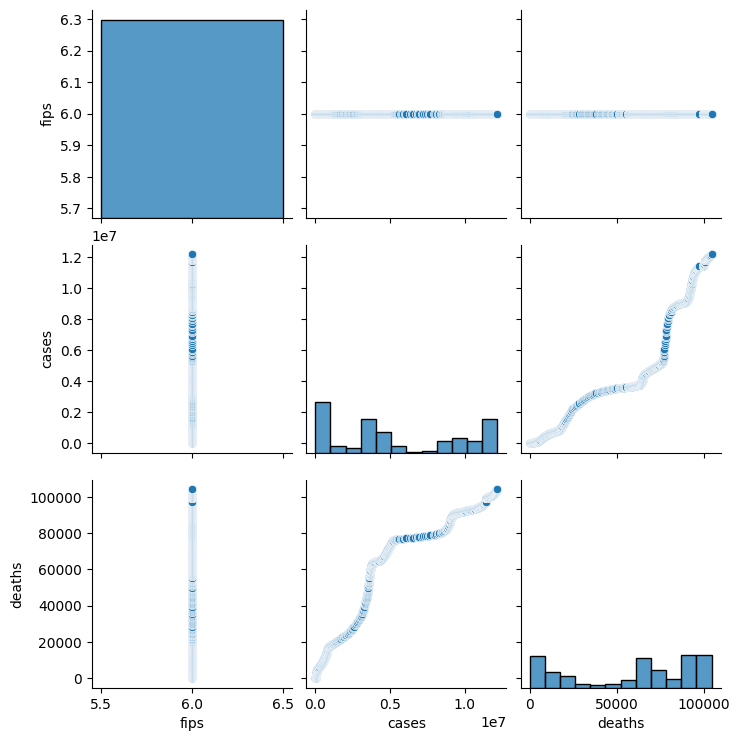

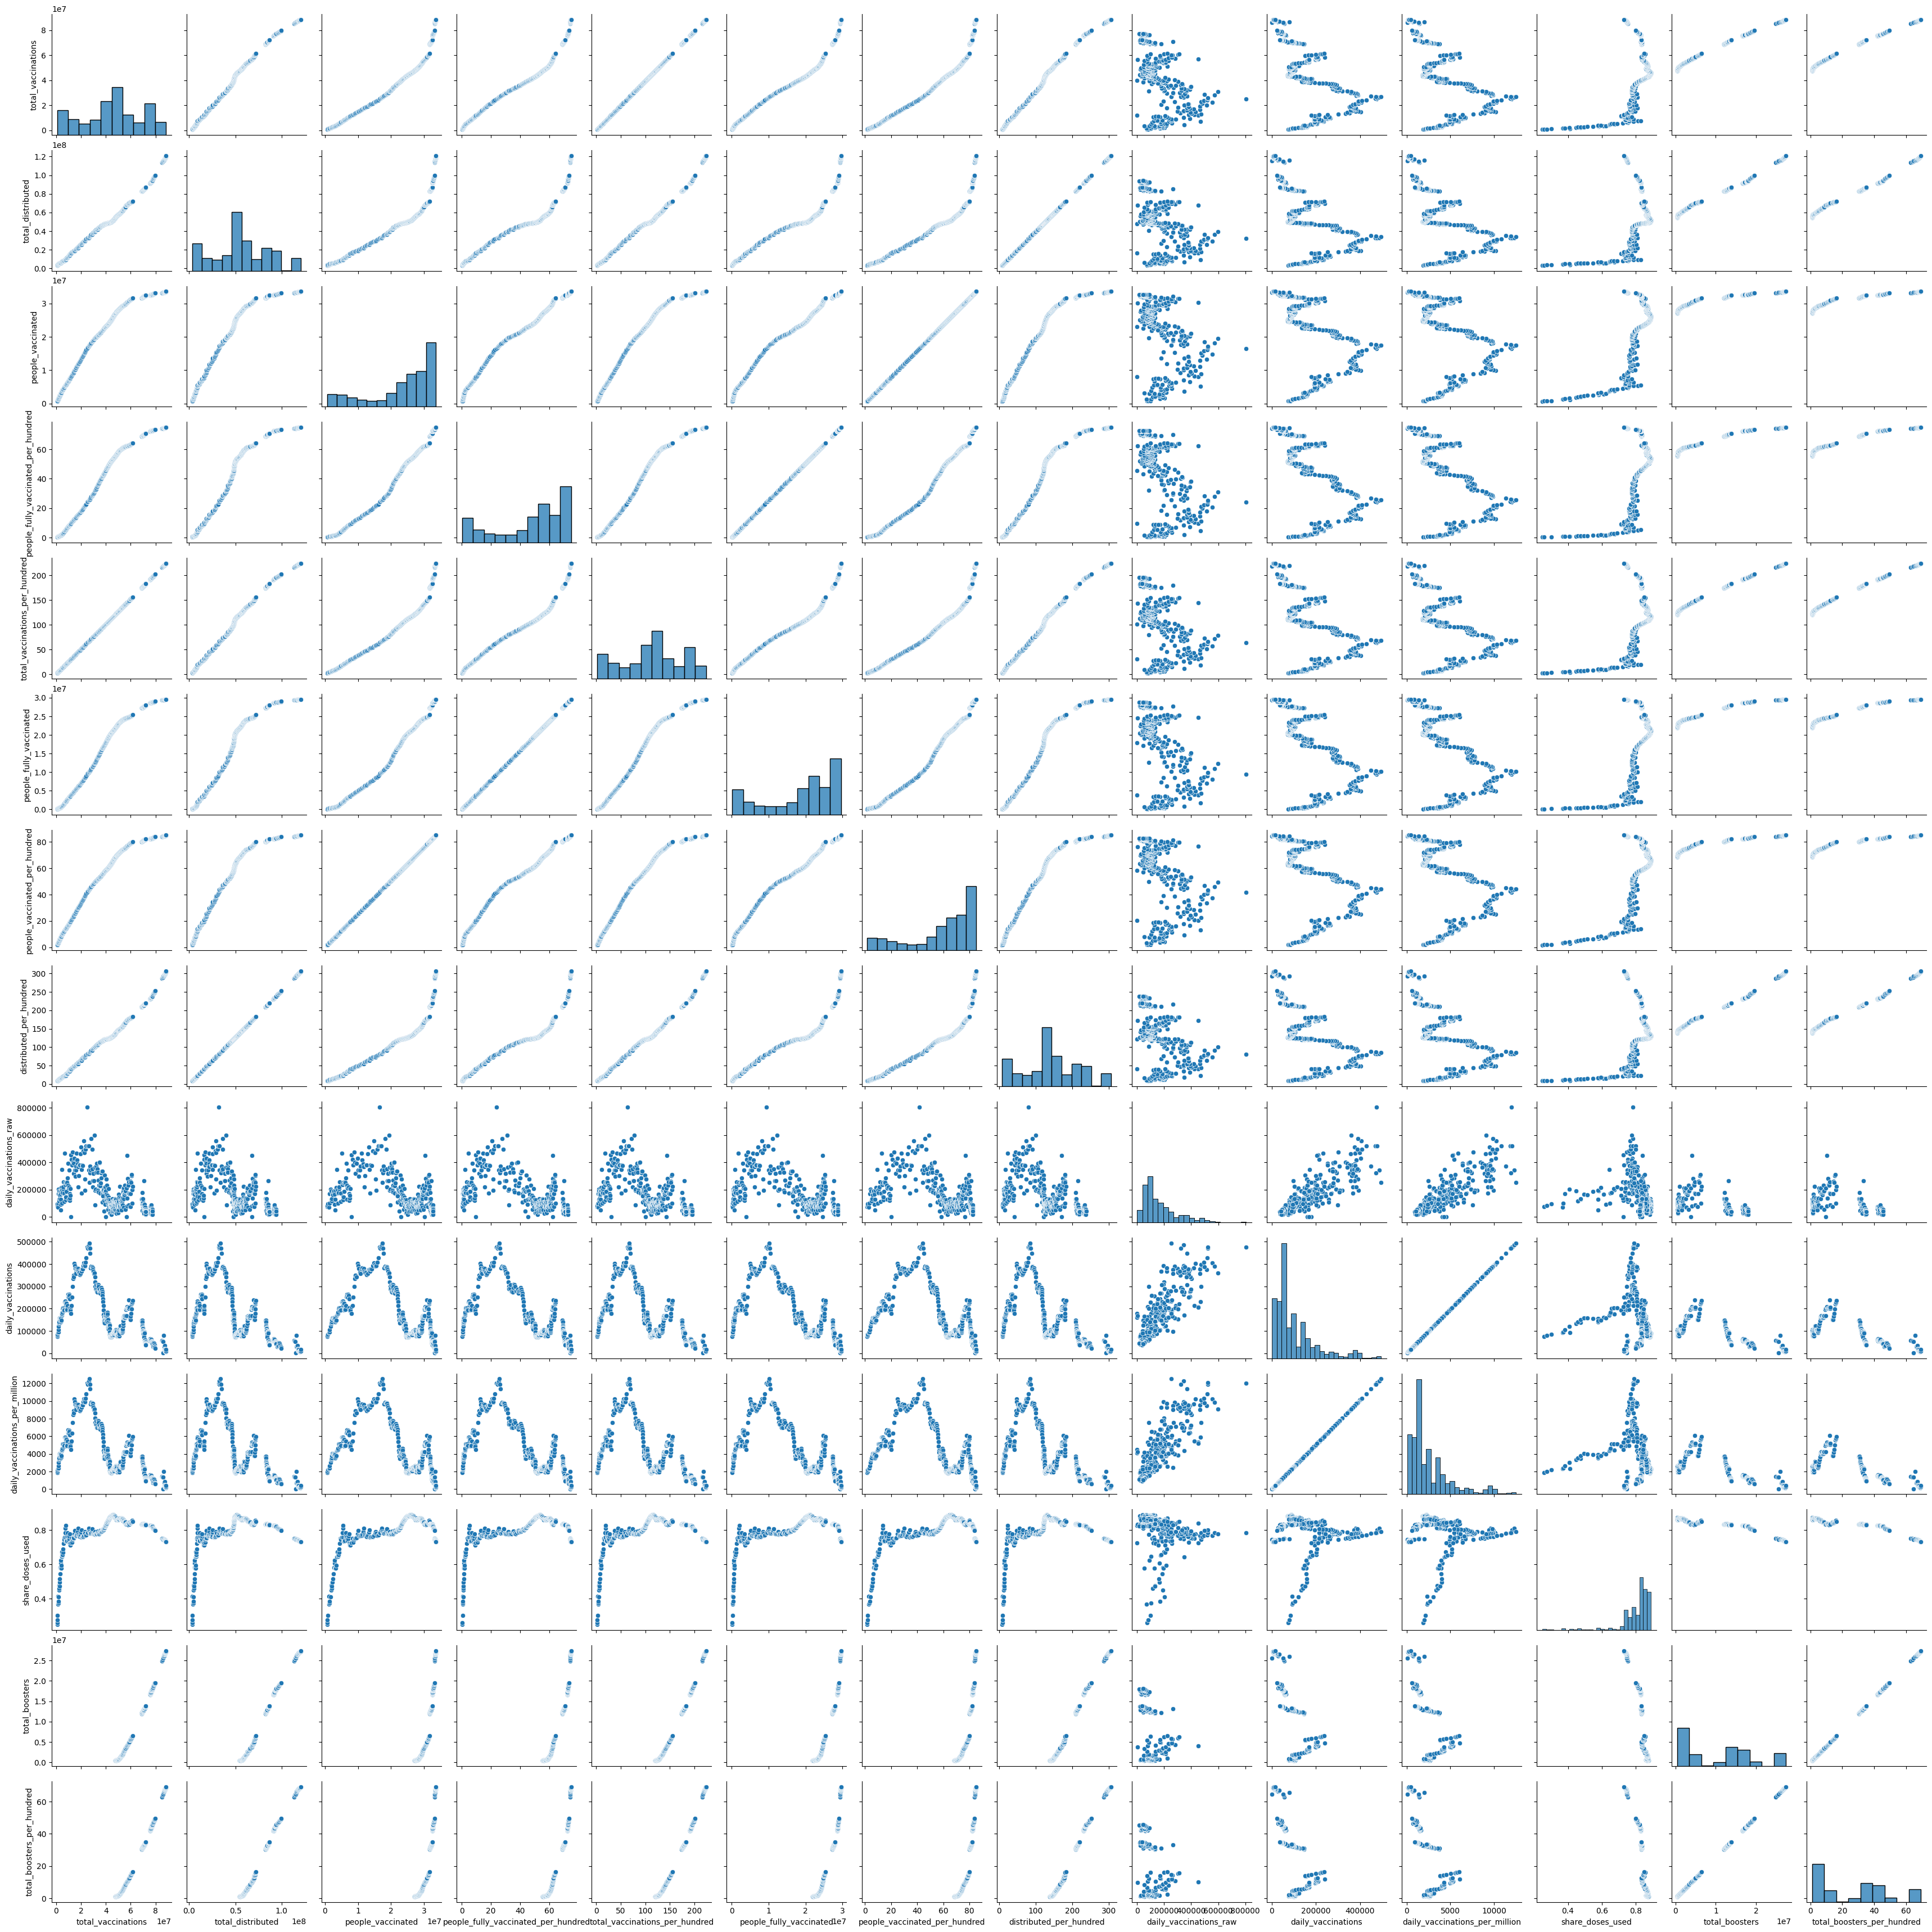

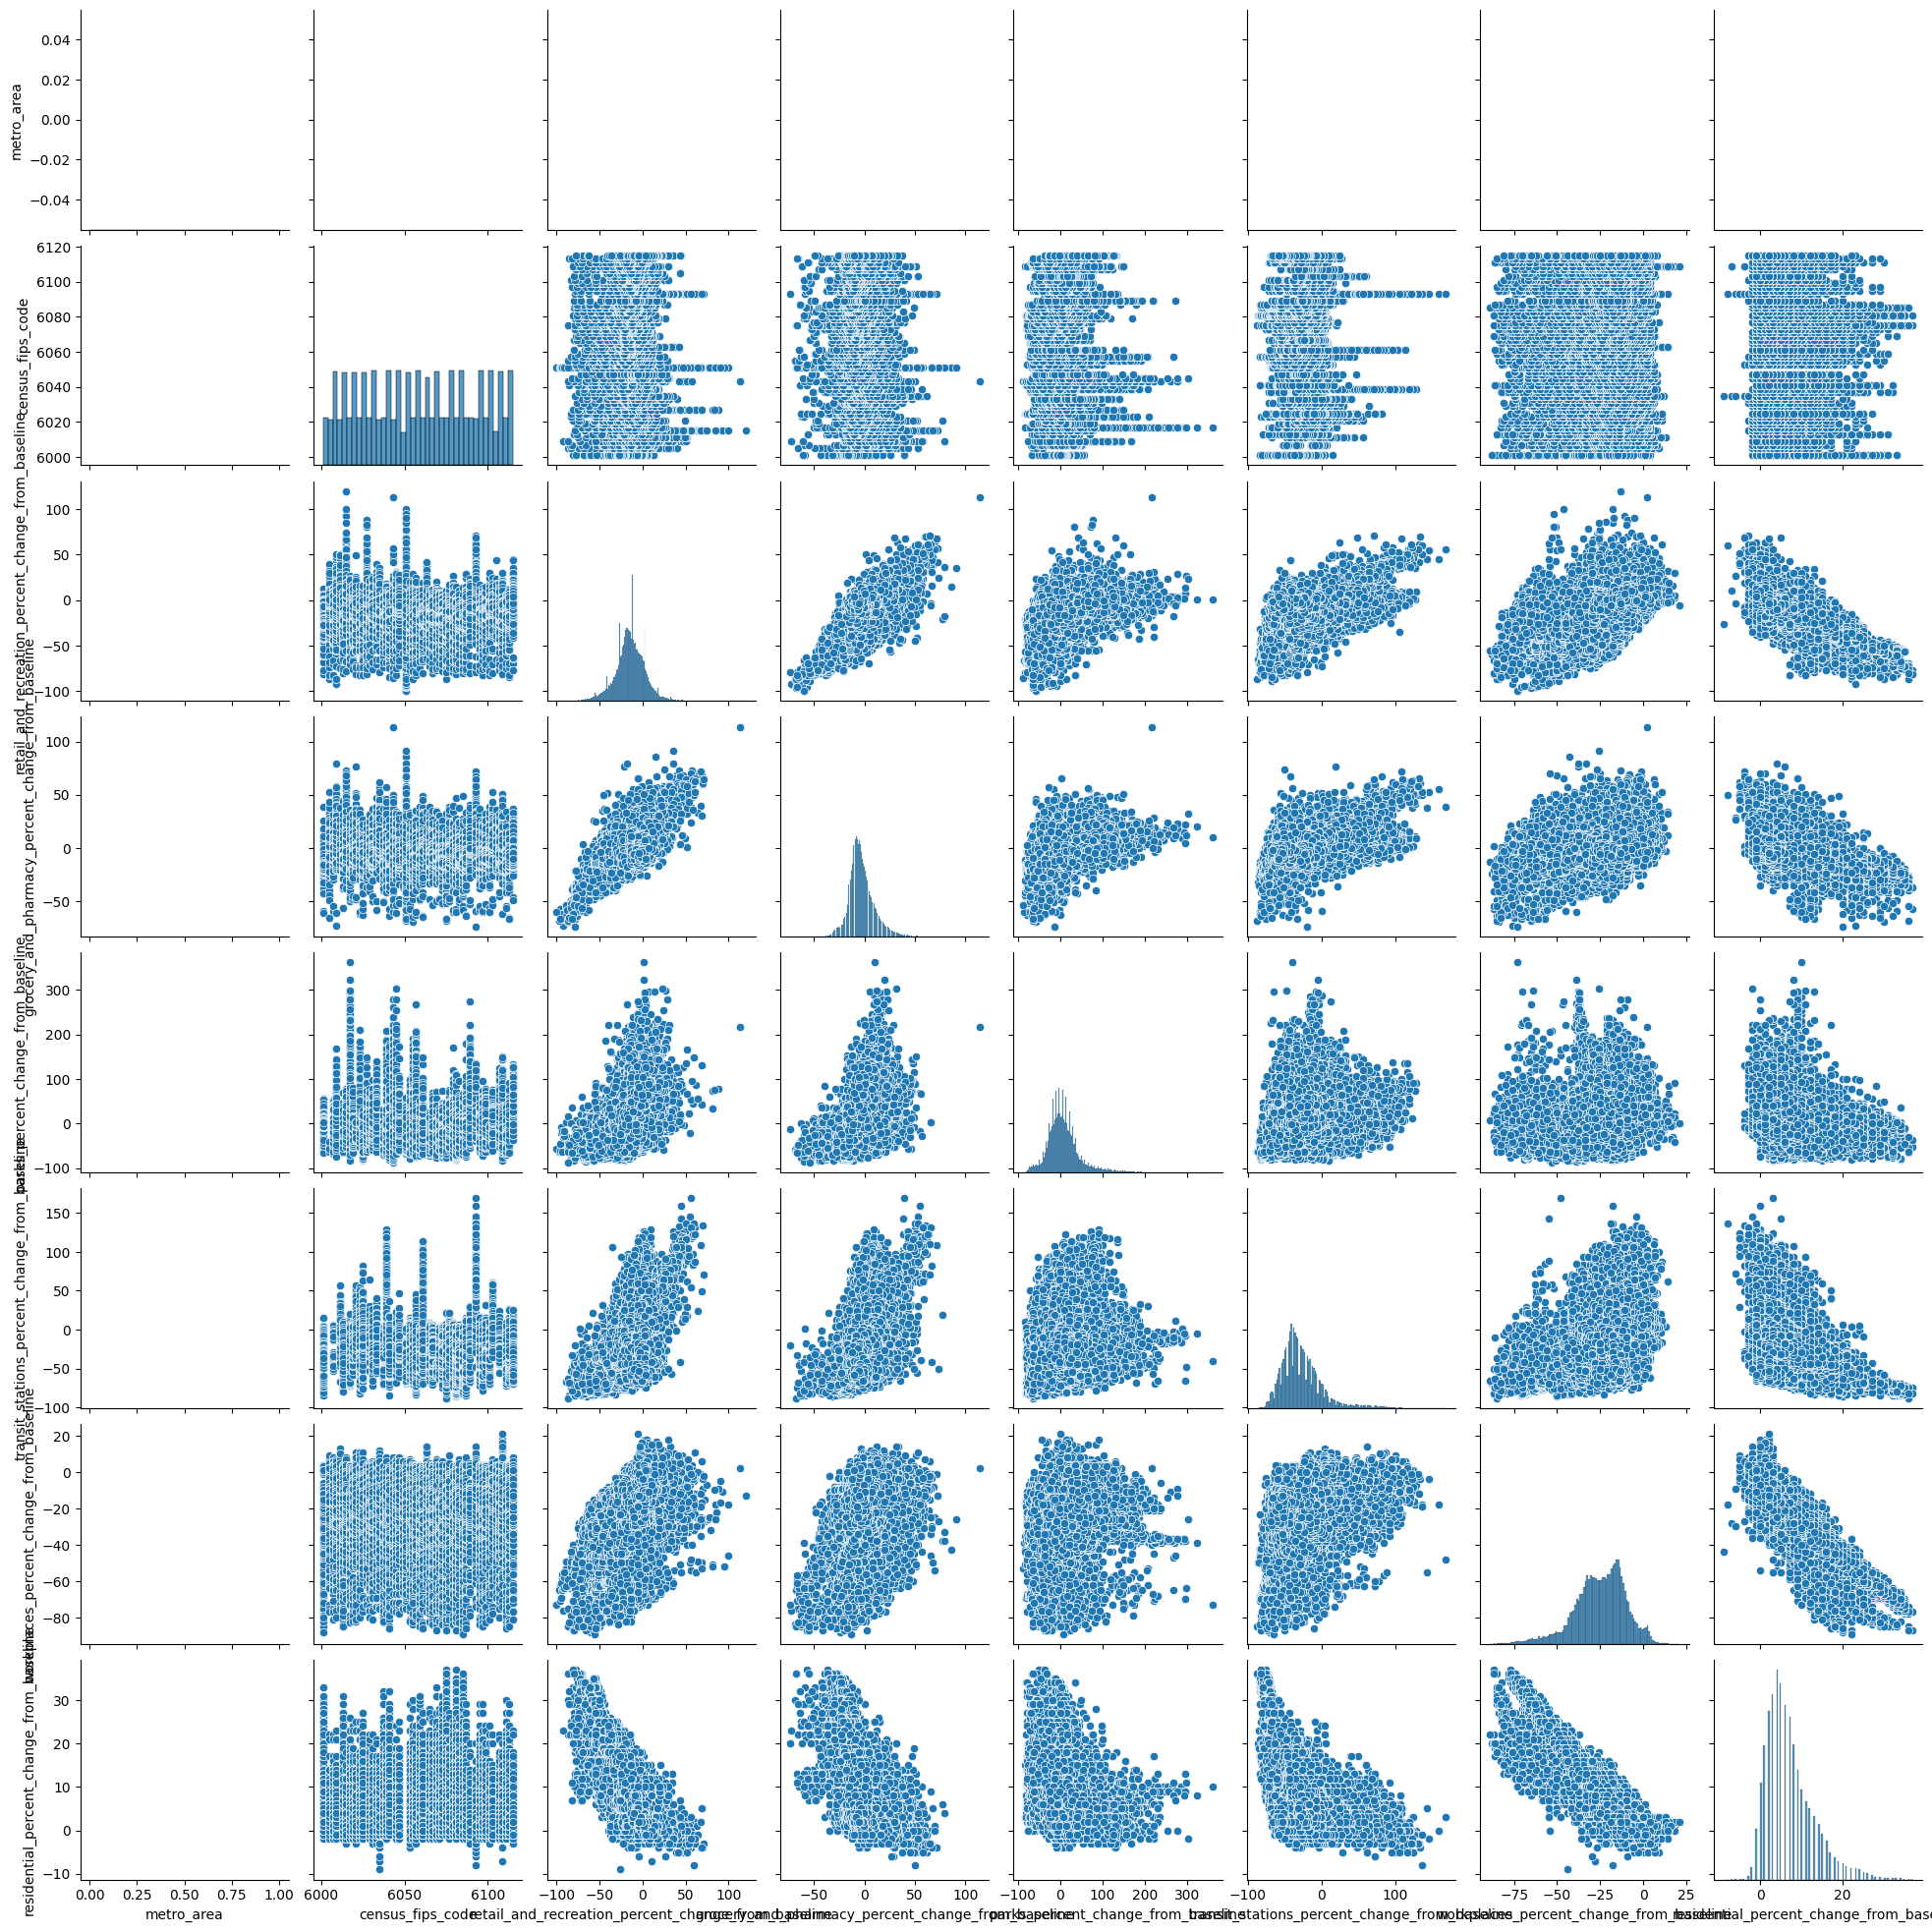

In [30]:
# TODO Q9
# create visualization
sns.pairplot(df_cases_subset)
sns.pairplot(df_vax_subset)
sns.pairplot(df_subset)

**TODO** Q10: Answer the following questions:

-   Do the results seem to satisfy “common sense”?
    - Ja, Zu Pandemie-Beginn fallen Retail, Transit und Workplaces deutlich unter 0, während Residential steigt. Später normalisieren sich die Werte schrittweise.
-   Make sure to explain any trends, patterns, or notable anomalies
    observed in your mobility data.
    - Starker Einbruch im Frühjahr 2020; saisonale Peaks bei Parks; langsame Erholung von Transit/Workplaces; Residential bleibt länger über dem Ausgangsniveau.
-   Which trends, patterns, or notable anomalies in the mobility data
    are likely related to COVID-19 cases, non-pharmaceutical
    interventions such as stay-at-home orders, or vaccinations?
    - Einbrüche korrelieren mit Fallwellen und Maßnahmen. In Phasen strenger Maßnahmen steigen Residential und fallen Retail/Transit/Workplaces. Mit steigenden Impfungen bzw. rückläufigen Fällen kehren Retail/Transit/Workplaces Richtung 0 zurück.

-   Which trends, patterns, or notable anomalies in the mobility data
    are likely related to other factors?
    - Wochenenden/Feiertage erhöhen Parks und senken Workplaces; Wetter beeinflusst Parks; Schulferien verändern Transit/Residential; regionale Ereignisse verursachen Kurz-Peaks.
-   Cite specific evidence from your plot to support your answer.
    - Beispiel California
      - März–April 2020: Retail/Transit/Workplaces stark negativ, Residential positiv.
      - Sommer/Herbst: Parks zeigen hohe positive Ausreißer.
      - Späte Phasen: langsame Annäherung an Baseline parallel zu steigenden Impfungen oder abflachenden Fallzahlen.
